In [2]:
###### from qutip import *
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
for x in np.linspace(-np.pi, np.pi, 11):
    print(np.abs(rz(x).tr()) / 2)

6.123233995736766e-17
0.30901699437494745
0.5877852522924731
0.8090169943749475
0.9510565162951535
1.0
0.9510565162951535
0.8090169943749475
0.5877852522924731
0.30901699437494745
6.123233995736766e-17


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  


In [4]:
M = 100000

In [5]:
error_samples = np.random.normal(0, np.pi / 4, M) + np.pi / 4

integrals = []

xs = np.linspace(-np.pi, np.pi, 100)

for x in xs:
    integrals.append(np.mean(np.power(np.cos(error_samples + x), 2)))

print(integrals)

[0.5010228173777449, 0.482588936436416, 0.46443520602545496, 0.4468537264628127, 0.4301273903360754, 0.41452533065483216, 0.4002985903998045, 0.3876760831473108, 0.37686090976413344, 0.3680270904385422, 0.3613167646303242, 0.3568379039936658, 0.3546625750728207, 0.35482577972443424, 0.35732489192456846, 0.3621197000224093, 0.36913305376078176, 0.37825210565266787, 0.3893301267395156, 0.4021888675151088, 0.4166214260268478, 0.43239557700561737, 0.44925750845729884, 0.46693590559276593, 0.48514631638440603, 0.5035957285057253, 0.521987284009368, 0.5400250558826152, 0.5574188096237953, 0.5738886732240627, 0.5891696404127866, 0.6030158347076472, 0.6152044656592781, 0.6255394136329949, 0.6338543854471324, 0.6400155900925877, 0.6439238914802401, 0.6455164035777347, 0.6447675022692844, 0.641689237657285, 0.636331140171656, 0.6287794236066828, 0.6191555979087935, 0.6076145140360348, 0.5943418723481902, 0.5795512346184768, 0.5634805877446696, 0.5463885144508283, 0.5285500325944702, 0.5102521700

In [6]:
print(np.pi / 4)

0.7853981633974483


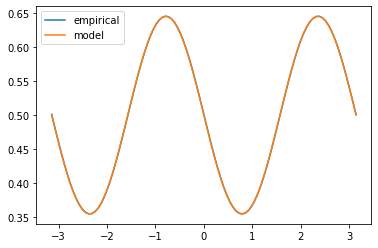

In [7]:
plt.figure()
plt.plot(xs, integrals, label="empirical")
plt.plot(xs, (1 - 2 * np.min(integrals)) * np.power(np.cos(xs + np.mean(error_samples)), 2) + np.min(integrals), label="model")
plt.legend()
plt.show()

In [19]:
M = 100000
error_samples = np.random.lognormal(0, np.pi / 4, M) - 1

integrals = []


xs = np.linspace(- np.pi, np.pi, 100)

for x in xs:
    integrals.append(np.mean(np.power(np.cos(error_samples + x), 2)))

print(integrals)
print(min(integrals))

[0.706888991351822, 0.7136447687537709, 0.7169629218510286, 0.7167900603181482, 0.7131289655619028, 0.7060385459674079, 0.6956328890401562, 0.6820794256953436, 0.6655962362317704, 0.6464485413381965, 0.624944434593177, 0.6014299251240521, 0.5762833701905646, 0.5499093872749153, 0.5227323436350121, 0.4951895280764322, 0.46772411481184695, 0.4407780326220425, 0.4147848540564064, 0.39016281908830514, 0.3673081054773485, 0.346588454120934, 0.3283372519655477, 0.3128481676859959, 0.3003704264464956, 0.2911047997744883, 0.28520037507160645, 0.28275215674157234, 0.2837995375337784, 0.2883256646992033, 0.29625771115745186, 0.3074680473117416, 0.3217762946568901, 0.3389522281369878, 0.35871948055272784, 0.38075998941309974, 0.40471911467993055, 0.43021134505885644, 0.45682650102035927, 0.4841363347419438, 0.5117014207759092, 0.5390782265692994, 0.5658262490687082, 0.5915151025793082, 0.6157314438317889, 0.638085622830292, 0.6582179524667029, 0.675804496020868, 0.6905622794236821, 0.702253844415

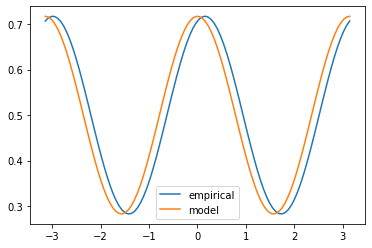

In [20]:
plt.figure()
plt.plot(xs, integrals, label="empirical")
plt.plot(xs, (1 - 2 * np.min(integrals)) * np.power(np.cos(xs), 2) + np.min(integrals), label="model")
plt.legend()
plt.show()

In [142]:
from scipy.stats import moment

print(np.mean(error_samples))

for i in range (2, 6):
    print(moment(error_samples, moment=i), moment(np.power(np.cos(error_samples), 2), moment=i))

0.36280026979320923
1.6136712915208706 0.08383350809284452
7.549685707085924 -0.024909685000145086
85.15182791924035 0.021114015391557987
1381.8976187993446 -0.011673042631848223


In [124]:
from scipy.stats import skew

In [125]:
skew(error_samples)

3.707835580965624

In [127]:
print(np.exp(np.pi **2 / 32) - 1)
print(np.mean(error_samples))

0.36127959698544054
0.362115451671189


In [130]:
(np.exp(np.pi **2 / 16) - 1) * np.exp( np.pi **2 / 16 )

1.580831280750062

In [44]:
from scipy.stats import skewnorm

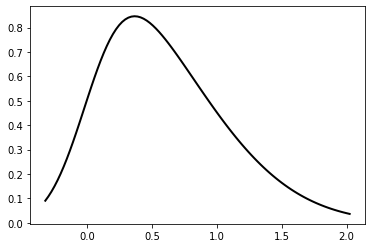

In [52]:
a = np.pi
x = np.linspace(skewnorm.ppf(0.01, a, scale=np.pi/4),
                 skewnorm.ppf(0.99, a, scale=np.pi/4), 100)
rv = skewnorm(a, scale=np.pi/4)

plt.figure()
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
plt.show()

In [101]:
error_samples = np.random.noncentral_chisquare(np.pi / 2, np.pi / 4, M)

integrals = []

xs = np.linspace(- np.pi, np.pi, 100)

for x in xs:
    integrals.append(np.mean(np.power(np.cos(error_samples + x), 2)))

print(integrals)
print(np.mean(error_samples))

[0.5491736168630994, 0.5357578255682669, 0.5217666774745137, 0.5074252953920918, 0.49296443752723806, 0.4786167844962522, 0.46461319540728063, 0.451178993250846, 0.4385303393685833, 0.4268707553363351, 0.41638784822581043, 0.40725029193657225, 0.39960511316985287, 0.3935753257138928, 0.38925795110603956, 0.3867224575198925, 0.3860096419963854, 0.3871309740041259, 0.3900684108913516, 0.39477468819895156, 0.4011740801633064, 0.4091636181721712, 0.41861474756819245, 0.4293753961414674, 0.4412724210283282, 0.4541143946448314, 0.46769468482824406, 0.4817947796258905, 0.4961878032342696, 0.5106421665156609, 0.5249252933540435, 0.538807362891865, 0.5520650074336698, 0.5644849065159347, 0.5758672193131811, 0.5860288001516641, 0.5948061453918225, 0.602058024263045, 0.6076677513196365, 0.6115450639533203, 0.6136275747523936, 0.613881775338535, 0.6123035755291568, 0.6089183691499727, 0.6037806254388365, 0.596973012615315, 0.58860506771809, 0.5788114341130006, 0.567749695030886, 0.5555978379944118

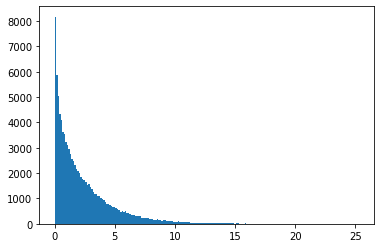

In [100]:
plt.hist(error_samples, bins=200)
plt.show()

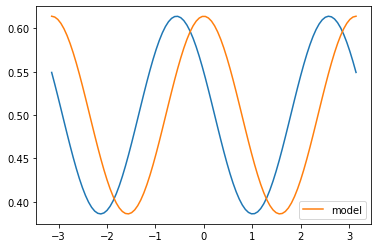

In [102]:
plt.figure()
plt.plot(xs, integrals)
plt.plot(xs, (1 - 2 * np.min(integrals)) * np.power(np.cos(xs - np.mean()), 2) + np.min(integrals), label="model")
plt.legend()
plt.show()

In [52]:
from qutip.operators import sigmax, sigmay, sigmaz
from qutip.qip.operations import rotation
from qutip import expect, basis, qeye

In [10]:
M = 100

MU = np.pi / 8
SIGMA = np.pi / 8

error_samples = np.random.normal(MU, SIGMA, M)

In [11]:
axis = [1/np.sqrt(3), np.sqrt(2 / 3), 0]

errors = [rotation(axis[0] * sigmax() + axis[1] * sigmay() + axis[2] * sigmaz(),
            theta) for theta in error_samples]

In [12]:
prepared_state = basis(2, 0)

In [7]:
prepared_state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [8]:
sigmax() * prepared_state

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [14]:
pauli_decomp = [(error * prepared_state, expect(sigmax(), error * prepared_state), expect(sigmay(), error * prepared_state), expect(sigmaz(), error * prepared_state)) for error in errors]

In [10]:
np.pi / 8 - np.pi/2

-1.1780972450961724

In [60]:
mean_rot = rotation(axis[0] * sigmax() + axis[1] * sigmay() + axis[2] * sigmaz(),
            np.pi / 8) * prepared_state

print(mean_rot)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.98078528+0.j        ]
 [0.15929058-0.11263545j]]


In [61]:
print(np.mean([np.abs(mean_rot.overlap(p[0])) ** 2 for p in pauli_decomp]))

0.965481862699231


In [12]:
2 * np.arccos(0.981)

0.3904917247318607

In [18]:
ideal = rotation(axis[0] * sigmax() + axis[1] * sigmay() + axis[2] * sigmaz(),
            np.pi / 8 - np.pi/2) * prepared_state

print(ideal)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.83146961+0.j        ]
 [-0.4536212 +0.32075862j]]


In [14]:
2 * np.arccos(0.831)

1.179786736951294

In [15]:
(-0.454+0.321j) / np.sin(1.179786736951294 / 2)

(-0.8161468869034945+0.5770553980088584j)

In [16]:
np.arctan(0.577 / 0.816)

0.6154804166371712

In [17]:
np.sin(1.179786736951294 / 2) * np.exp(1j * 0.6154804166371712)

(0.45419429776588954+0.3211643502584783j)

In [ ]:
thetas = np.linspace(-np.pi, np.pi, 17)
phis = np.linspace(-np.pi, np.pi, 17)
loss = np.zeros((len(thetas), len(phis)))
for i, theta in enumerate(thetas):
    for j, phi in enumerate(phis):
        # print("rot: ", theta, phi)
        meas = np.cos(theta / 2) * prepared_state + np.exp(1j * phi) * np.sin(theta / 2) * sigmax() * prepared_state
        meas = meas.unit()
        objective = 0

        p_1 = np.mean([p[0].overlap(meas) * meas.overlap(p[0]) for p in pauli_decomp])

        for d in [1,2,3]:
            pauli_obj = 0
            for p in pauli_decomp:
                for p_prime in pauli_decomp:
                    pauli_obj += (1/2) * (
                        (1-p_1) * p[0].overlap(meas) * meas.overlap(p[0]) * p[d] - p_1 * (1 - p_prime[0].overlap(meas) * meas.overlap(p_prime[0])) * p_prime[d]
                    )
            objective += np.abs(pauli_obj)
        objective = objective / (len(pauli_decomp) ** 2)
        # print("loss: ", objective)
        # print("\n")
        loss[i][j] = objective

In [23]:
thetas = np.linspace(-np.pi, np.pi, 33)
phis = np.linspace(-np.pi, np.pi, 33)
loss = np.zeros((len(thetas), len(phis)))

min_phi = 0.
min_theta = 0.
min_loss = 1.

max_phi = 0.
max_theta = 0.
max_loss = 0.
for i, theta in enumerate(thetas):
    for j, phi in enumerate(phis):
        # print("rot: ", theta, phi)
        meas = np.cos(theta / 2) * prepared_state + np.exp(1j * phi) * np.sin(theta / 2) * sigmax() * prepared_state
        meas = meas.unit()
#         objective = 0
#         for p in pauli_decomp:
#             objective += (p[0].overlap(meas) * meas.overlap(p[0])) * (1 - p[0].overlap(meas) * meas.overlap(p[0]))
#         objective /= len(pauli_decomp)
        
        objective = np.var([p[0].overlap(meas) * meas.overlap(p[0]) for p in pauli_decomp])
#         objective = np.mean([(p[0].overlap(meas) * meas.overlap(p[0])) ** 2 for p in pauli_decomp])
        if (np.abs(objective) < min_loss):
            min_loss = objective
            min_phi = phi
            min_theta = theta
        if (np.abs(objective) > max_loss):
            max_loss = objective
            max_phi = phi
            max_theta = theta
#         print("loss: ", objective)
        # print("\n")
        loss[i][j] = np.abs(objective)

In [76]:
print(min_theta, min_phi)
print(max_theta, max_phi)
print(max_loss)

-1.5707963267948966 0.9817477042468106
-1.9634954084936207 2.552544031041707
0.03184089135456872


In [19]:
objective_max = 0
objective_min = 0
meas_max = np.cos(max_theta / 2) * prepared_state + np.exp(1j * max_phi) * np.sin(max_theta / 2) * sigmax() * prepared_state
meas_min = np.cos(min_theta / 2) * prepared_state + np.exp(1j * min_phi) * np.sin(min_theta / 2) * sigmax() * prepared_state
print(meas_max.overlap(ideal) * ideal.overlap(meas_max))
print(meas_min.overlap(ideal) * ideal.overlap(meas_min))
print(meas_min.overlap(meas_max) * meas_max.overlap(meas_min))

print(np.mean([p[0].overlap(meas_max) * meas_max.overlap(p[0]) for p in pauli_decomp]))
print(np.mean([1 - p[0].overlap(meas_max) * meas_max.overlap(p[0]) for p in pauli_decomp]))

print(np.mean([p[0].overlap(meas_min) * meas_min.overlap(p[0]) for p in pauli_decomp]))
print(np.mean([1 - p[0].overlap(meas_min) * meas_min.overlap(p[0]) for p in pauli_decomp]))

for p in pauli_decomp:
    objective_max += (p[0].overlap(meas_max) * meas_max.overlap(p[0])) * (1 - p[0].overlap(meas_max) * meas_max.overlap(p[0]))
    objective_min += (p[0].overlap(meas_min) * meas_min.overlap(p[0])) * (1 - p[0].overlap(meas_min) * meas_min.overlap(p[0]))
print(objective_max / len(pauli_decomp))
print(objective_min / len(pauli_decomp))

(0.00014906491496901748+0j)
(0.48779185181073725+0j)
(0.5000000000000001+0j)
(0.5004322638562517+0j)
(0.49956773614374833+0j)
(0.5047196406087834+0j)
(0.49528035939121656+0j)
(0.2181589217933898+0j)
(0.2499583272365984+0j)


In [39]:
alpha = 0
beta = 0
gamma = 0


g1 = 1j * alpha * sigmaz()
g2 = 1j * beta * sigmay()
g3 = 1j * gamma * sigmaz()

gate = g1.expm() * g2.expm() * g3.expm()

eta = np.pi / 32

for i in range(10):
    r_plus = np.abs(np.mean([((1j * (beta + np.pi / 4) * sigmay()).expm() * p[0]).overlap(prepared_state) for p in pauli_decomp])) ** 2
    r_minus = np.abs(np.mean([((1j * (beta - np.pi / 4) * sigmay()).expm() * p[0]).overlap(prepared_state) for p in pauli_decomp])) ** 2
    grad = (r_plus - r_minus)
    print("grad: ", r_plus - r_minus)

    avg_fidelity = np.abs(np.mean([((1j * (beta) * sigmay()).expm() * p[0]).overlap(prepared_state) for p in pauli_decomp])) ** 2
    print("avg fidelity: ", avg_fidelity)

    beta += grad * eta

grad:  0.30182123408755474
avg fidelity:  0.9282913970544265
grad:  0.24849032399355753
avg fidelity:  0.9364469883657962
grad:  0.20391961563959476
avg fidelity:  0.9419664622941153
grad:  0.1669760277352736
avg fidelity:  0.9456795795202028
grad:  0.1365234252830107
avg fidelity:  0.9481674103248151
grad:  0.11151416181121748
avg fidelity:  0.9498297530983872
grad:  0.09102599037871378
avg fidelity:  0.950938489755652
grad:  0.07426925574786825
avg fidelity:  0.95167708624014
grad:  0.06057940559254671
avg fidelity:  0.9521687105010038
grad:  0.04940329643285096
avg fidelity:  0.952495768226442


In [62]:
theta = [0, 0, 0]

eta = np.pi / 32

for i in range(100):
    for j in range(3):
        sigmas = [
            sigmaz(),
            sigmay(),
            sigmaz()
            ]
        g1 = 1j * theta[0] * sigmas[0]
        g2 = 1j * theta[1] * sigmas[1]
        g3 = 1j * theta[2] * sigmas[2]

        preps = [
            qeye(2),
            g1.expm(),
            g2.expm() * g1.expm()
        ]

        obs = [
            g3.expm() * g2.expm(),
            g3.expm(),
            qeye(2)
        ]
    
        lo = [np.abs((obs[j] * (1j * (theta[j] - np.pi / 4) * sigmas[j]).expm() * preps[j] * p[0]).overlap(prepared_state)) ** 2 for p in pauli_decomp]
        mid = [np.abs((obs[j] * (1j * (theta[j]) * sigmas[j]).expm() * preps[j] * p[0]).overlap(prepared_state)) ** 2 for p in pauli_decomp]
        hi = [np.abs((obs[j] * (1j * (theta[j] + np.pi / 4) * sigmas[j]).expm() * preps[j] * p[0]).overlap(prepared_state)) ** 2 for p in pauli_decomp]

        r_plus = np.mean(hi)
        r_minus = np.mean(lo)
        grad = (r_plus - r_minus)
        print("grad: ", grad)

        avg_fidelity = np.mean(mid)
        print("avg fidelity: ", avg_fidelity)

        theta[j] += grad * eta

grad:  0.0
avg fidelity:  0.9298616921539066
grad:  0.2916277541190247
avg fidelity:  0.9298616921539066
grad:  0.0
avg fidelity:  0.9375020481614732
grad:  -0.011801446555425144
avg fidelity:  0.9375020481614732
grad:  0.24242435606343926
avg fidelity:  0.9375156989523065
grad:  0.0
avg fidelity:  0.9427876519522377
grad:  -0.021513173778765382
avg fidelity:  0.9427876519522377
grad:  0.20137492171820326
avg fidelity:  0.9428329523508617
grad:  0.0
avg fidelity:  0.9464669667540468
grad:  -0.02939864900153666
avg fidelity:  0.9464669667540468
grad:  0.1673697264072292
avg fidelity:  0.9465514656434906
grad:  0.0
avg fidelity:  0.9490599932694012
grad:  -0.035726796156025364
avg fidelity:  0.9490599932694012
grad:  0.13932648365697142
avg fidelity:  0.9491846648052978
grad:  0.0
avg fidelity:  0.9509221110467395
grad:  -0.0407482228054078
avg fidelity:  0.9509221110467395
grad:  0.116262728812417
avg fidelity:  0.9510841593208182
grad:  -1.1102230246251565e-16
avg fidelity:  0.95229354

In [50]:
beta = 0

eta = np.pi

for i in range(10):
    lo = [np.abs(((1j * (beta - np.pi / 4) * sigmay()).expm() * prepared_state).overlap(p[0])) ** 2 for p in pauli_decomp]
    mid = [np.abs(((1j * (beta) * sigmay()).expm() * prepared_state).overlap(p[0])) ** 2 for p in pauli_decomp]
    hi = [np.abs(((1j * (beta + np.pi / 4) * sigmay()).expm() * prepared_state).overlap(p[0])) ** 2 for p in pauli_decomp]
    
    mu = np.mean(mid)
    
    var_grad = 0
    for l, m, h in zip(lo, mid, hi):
        var_grad += 2 * (m  - mu) * (l - h)
    var_grad /= len(lo)
    
    print("grad: ", var_grad)
    avg_fidelity = np.abs(np.mean([((1j * (beta) * sigmay()).expm() * p[0]).overlap(ideal) for p in pauli_decomp])) ** 2
    print("avg fidelity: ", avg_fidelity)

    beta += var_grad * eta

-0.03390665748152229
avg fidelity:  0.482367272223541
-0.020160588109318815
avg fidelity:  0.3977801946780452
-0.010087845198343978
avg fidelity:  0.34783770143363374
-0.004763638013897885
avg fidelity:  0.32326626374694456
-0.0022176027024415775
avg fidelity:  0.3118001674817992
-0.0010290885213566016
avg fidelity:  0.3064965498737376
-0.00047722566098668527
avg fidelity:  0.30404317655572555
-0.0002212741568752371
avg fidelity:  0.30290717738291933
-0.00010259443559456334
avg fidelity:  0.3023808249657894
-4.756789716781218e-05
avg fidelity:  0.30213686083945596


In [92]:
theta = [np.pi/3, np.pi/2, -np.pi/16]

eta = np.pi / 4

for i in range(25):
    for j in range(3):
        sigmas = [
            sigmay(),
            sigmax(),
            sigmay()
            ]
        g1 = 1j * theta[0] * sigmas[0]
        g2 = 1j * theta[1] * sigmas[1]
        g3 = 1j * theta[2] * sigmas[2]

        preps = [
            qeye(2),
            g1.expm(),
            g2.expm() * g1.expm()
        ]

        obs = [
            g3.expm() * g2.expm(),
            g3.expm(),
            qeye(2)
        ]

        lo = [np.abs((obs[j] * (1j * (theta[j] - np.pi / 4) * sigmas[j]).expm() * preps[j] * p[0]).overlap(prepared_state)) ** 2 for p in pauli_decomp]
        mid = [np.abs((obs[j] * (1j * (theta[j]) * sigmas[j]).expm() * preps[j] * p[0]).overlap(prepared_state)) ** 2 for p in pauli_decomp]
        hi = [np.abs((obs[j] * (1j * (theta[j] + np.pi / 4) * sigmas[j]).expm() * preps[j] * p[0]).overlap(prepared_state)) ** 2 for p in pauli_decomp]

        mu = np.mean(mid)

        var_grad = 0
        for l, m, h in zip(lo, mid, hi):
            var_grad += 2 * (m - mu)  * (h - l)
        var_grad /= len(lo)
        print("grad: ", var_grad)
        idealness = np.abs(((g3.expm() * g2.expm() * g1.expm()).dag() * prepared_state).overlap(ideal)) ** 2
        print('theta: ', theta)
        print("idealness: ", idealness)

        print("objective: ",
            np.var([np.abs(prepared_state.overlap(g3.expm() * g2.expm() * g1.expm() * p[0])) ** 2 for p in pauli_decomp])
        )

        theta[j] += var_grad * eta
        print("\n")

grad:  -0.03381619104470188
theta:  [1.0471975511965976, 1.5707963267948966, -0.19634954084936207]
idealness:  0.8814095013184132
objective:  0.0185447998626326


grad:  0.04828258637467899
theta:  [1.0206383768569915, 1.5707963267948966, -0.19634954084936207]
idealness:  0.8905743251299014
objective:  0.019404536908328142


grad:  0.03395432218290641
theta:  [1.0206383768569915, 1.608717381457648, -0.19634954084936207]
idealness:  0.9081206575027152
objective:  0.02116297613911768


grad:  -0.02899583945032792
theta:  [1.0206383768569915, 1.608717381457648, -0.16968187856750214]
idealness:  0.9165768587867283
objective:  0.02202081485829528


grad:  0.04702899161376178
theta:  [0.9978650978065368, 1.608717381457648, -0.16968187856750214]
idealness:  0.9225930042265601
objective:  0.022644726984264455


grad:  0.029424222798360815
theta:  [0.9978650978065368, 1.6456538650975305, -0.16968187856750214]
idealness:  0.9377375911403489
objective:  0.024288907982232367


grad:  -0.0232757945

In [86]:
((g3.expm() * g2.expm() * g1.expm()).dag() * prepared_state)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.18278982+0.80657991j]
 [-0.21336442-0.5200888j ]]

In [139]:
print(loss)

[[0.02827768 0.02827768 0.02827768]
 [0.02827768 0.02827768 0.02827768]]


Optimal theta: 1.180

Optimal phi: 0.615

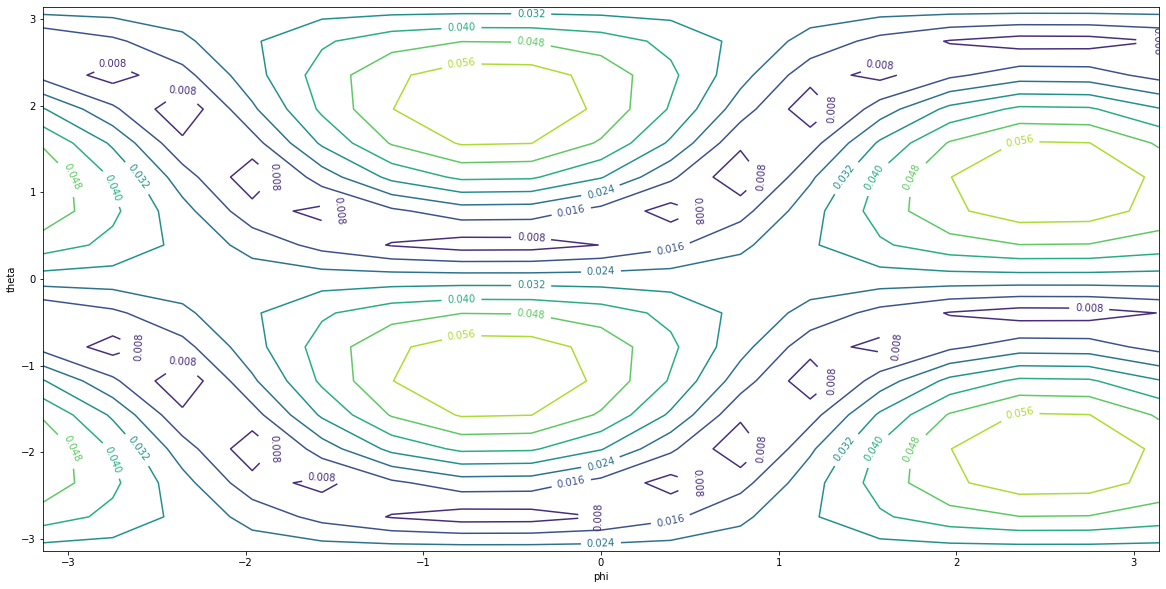

In [143]:
plt.figure(figsize=(20,10))
cs = plt.contour(phis, thetas, loss)
plt.clabel(cs, inline=True, fontsize=10)
plt.xlabel("phi")
plt.ylabel("theta")
plt.show()

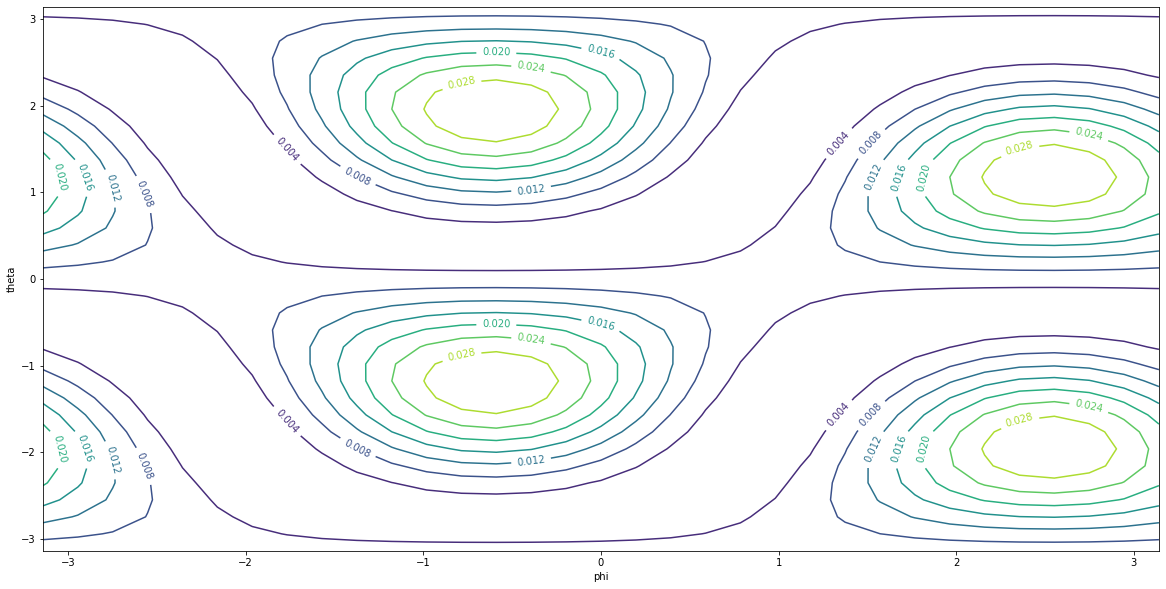

In [26]:
plt.figure(figsize=(20,10))
cs = plt.contour(phis, thetas, loss)
plt.clabel(cs, inline=True, fontsize=10)
plt.xlabel("phi")
plt.ylabel("theta")
plt.show()

In [41]:
print(objective)

13140.401080477946


In [28]:
rand_ket_haar(2)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.02905131-0.79952352j]
 [-0.00263688+0.599926j  ]]